In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as fun
from torch.optim import SGD

In [86]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


In [87]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [88]:
class simpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w01 = nn.Parameter(torch.rand(1), requires_grad= False)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad = False)
        self.w02 = nn.Parameter(torch.rand(1), requires_grad= False)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad = False)

        self.w10 = nn.Parameter(torch.rand(1), requires_grad = False)
        self.w11 = nn.Parameter(torch.rand(1), requires_grad = False)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad = False)
        self.w20 = nn.Parameter(torch.rand(1), requires_grad = False)

    def forward(self, input):
        input_to_layer01 = input*self.w00 + self.b00
        layer01_output = fun.sigmoid(input_to_layer01)
        layer01_output = layer01_output * self.w10

        input_to_layer02 = input * self.w01 + self.b01
        layer02_output = fun.sigmoid(input_to_layer02)
        layer02_output = layer02_output * self.w11

        input_to_layer03 = input * self.w02 + self.b02
        layer03_output = fun.sigmoid(input_to_layer03)
        layer03_output = layer03_output * self.w12

        output = layer01_output + layer02_output + layer03_output

        output = fun.tanh(output)
        output = output * self.w20

        return output

In [89]:
simple_nn = simpleNN()


In [90]:
x = torch.linspace(start=1, end=2.5, steps=40)
x

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [91]:
y = simple_nn(x)

In [92]:
y

tensor([0.4911, 0.4918, 0.4924, 0.4931, 0.4937, 0.4943, 0.4949, 0.4954, 0.4960,
        0.4965, 0.4971, 0.4976, 0.4981, 0.4986, 0.4991, 0.4995, 0.5000, 0.5004,
        0.5008, 0.5013, 0.5017, 0.5021, 0.5025, 0.5028, 0.5032, 0.5036, 0.5039,
        0.5043, 0.5046, 0.5049, 0.5053, 0.5056, 0.5059, 0.5062, 0.5065, 0.5068,
        0.5070, 0.5073, 0.5076, 0.5079])

<Axes: >

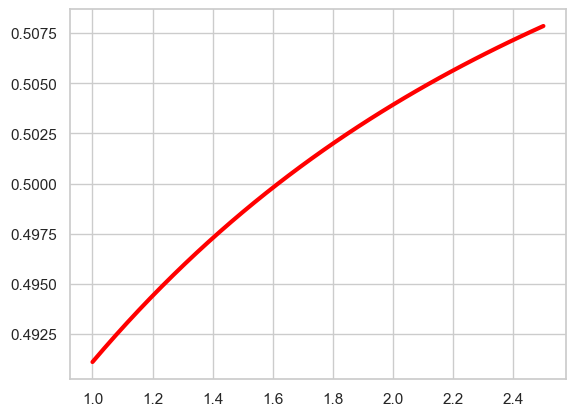

In [93]:
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")
sns.lineplot(
    x=x,
    y=y.detach(),
    linewidth=3,
    color='red'
)



In [94]:
class TrainableNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w01 = nn.Parameter(torch.rand(1), requires_grad= True)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w02 = nn.Parameter(torch.rand(1), requires_grad= True)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad = True)

        self.w10 = nn.Parameter(torch.rand(1), requires_grad = True)
        self.w11 = nn.Parameter(torch.rand(1), requires_grad = True)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad = True)
        self.w20 = nn.Parameter(torch.rand(1), requires_grad = True)

    def forward(self, input):
        input_to_layer01 = input*self.w00 + self.b00
        layer01_output = fun.sigmoid(input_to_layer01)
        layer01_output = layer01_output * self.w10

        input_to_layer02 = input * self.w01 + self.b01
        layer02_output = fun.sigmoid(input_to_layer02)
        layer02_output = layer02_output * self.w11

        input_to_layer03 = input * self.w02 + self.b02
        layer03_output = fun.sigmoid(input_to_layer03)
        layer03_output = layer03_output * self.w12

        output = layer01_output + layer02_output + layer03_output

        output = fun.tanh(output)
        output = output * self.w20

        return output
        

In [95]:
trainable_y = TrainableNN()

new_y = trainable_y(x)

new_y

tensor([0.2782, 0.2791, 0.2800, 0.2808, 0.2816, 0.2824, 0.2831, 0.2839, 0.2846,
        0.2852, 0.2859, 0.2865, 0.2871, 0.2877, 0.2883, 0.2889, 0.2894, 0.2899,
        0.2904, 0.2909, 0.2914, 0.2918, 0.2922, 0.2927, 0.2931, 0.2935, 0.2938,
        0.2942, 0.2946, 0.2949, 0.2952, 0.2955, 0.2958, 0.2961, 0.2964, 0.2967,
        0.2970, 0.2972, 0.2975, 0.2977], grad_fn=<MulBackward0>)

<Axes: >

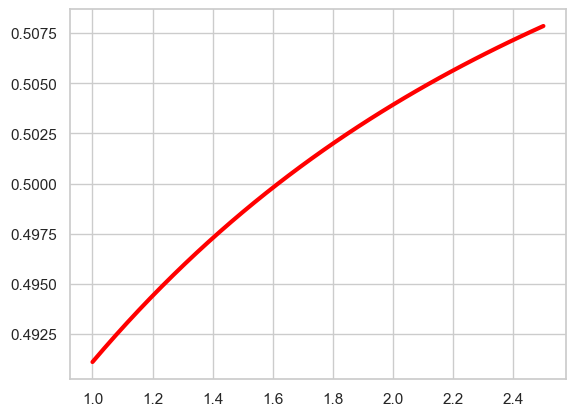

In [96]:
sns.set(style="whitegrid")
sns.lineplot(
    x = x,
    y = y.detach(),
    linewidth = 3,
    color = "red"
)

In [97]:
optimizer = SGD(trainable_y.parameters(), lr= 0.01)
loss = nn.MSELoss()

In [98]:
for epoch in range(50):
    total_loss = 0

    for i in range(len(x)):
        input_i = x[i]
        actual_output_i = y[i]

        pred_output_i = trainable_y(input_i)

        loss_value = loss(pred_output_i, actual_output_i)

        loss_value.backward()

        total_loss += loss_value.item()

    print('Epoch: ', epoch+1, ' | Total Loss: ', total_loss)
    optimizer.step()
    optimizer.zero_grad()

c:\Users\diaal\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  1  | Total Loss:  1.7766033113002777
Epoch:  2  | Total Loss:  0.3393627433106303
Epoch:  3  | Total Loss:  0.055301661137491465
Epoch:  4  | Total Loss:  0.008752995650866069
Epoch:  5  | Total Loss:  0.0017781994731080886
Epoch:  6  | Total Loss:  0.0007703393355242838
Epoch:  7  | Total Loss:  0.0006265534628795422
Epoch:  8  | Total Loss:  0.0006059591332316927
Epoch:  9  | Total Loss:  0.0006028200985248588
Epoch:  10  | Total Loss:  0.0006021487807146286
Epoch:  11  | Total Loss:  0.0006018263652727285
Epoch:  12  | Total Loss:  0.0006015527962439648
Epoch:  13  | Total Loss:  0.0006012873259848561
Epoch:  14  | Total Loss:  0.0006010230396924499
Epoch:  15  | Total Loss:  0.0006007579028022292
Epoch:  16  | Total Loss:  0.0006004946305040448
Epoch:  17  | Total Loss:  0.0006002293352764809
Epoch:  18  | Total Loss:  0.0005999673905776604
Epoch:  19  | Total Loss:  0.000599702777083877
Epoch:  20  | Total Loss:  0.0005994389803589684
Epoch:  21  | Total Loss:  0.000599176

In [99]:
pred_y = trainable_y(x)
pred_y

tensor([0.4826, 0.4839, 0.4853, 0.4866, 0.4878, 0.4890, 0.4902, 0.4913, 0.4924,
        0.4934, 0.4944, 0.4954, 0.4963, 0.4973, 0.4981, 0.4990, 0.4998, 0.5006,
        0.5014, 0.5021, 0.5028, 0.5035, 0.5041, 0.5048, 0.5054, 0.5060, 0.5066,
        0.5071, 0.5077, 0.5082, 0.5087, 0.5092, 0.5096, 0.5101, 0.5105, 0.5109,
        0.5113, 0.5117, 0.5121, 0.5124], grad_fn=<MulBackward0>)

<Axes: >

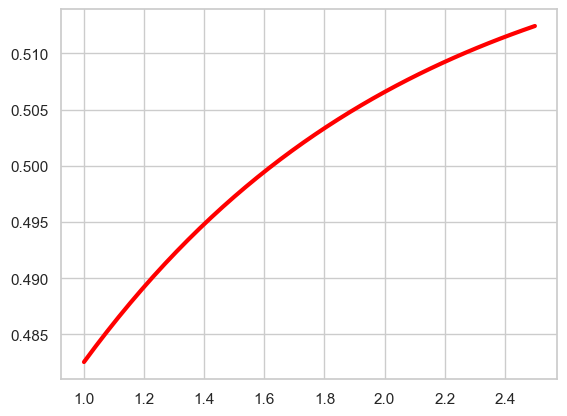

In [100]:
sns.set(style="whitegrid")
sns.lineplot(
    x= x, 
    y = pred_y.detach(),
    linewidth=3,
    color= "red"
)